In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Problem 1

In [2]:
df=pd.read_excel('compactiv.xlsx')

In [3]:
df.head()

lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  freemem  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40      CPU_Bound     4670   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  Not_CPU_Bound     7278   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20  Not_CPU_Bound      702   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  Not_CPU_Bound     7248   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60  Not_CPU_Bound      633   

  freeswap  usr  
0  1730946   95  
1  1869002   97  
2  1021237   87  
3  1863704   98  
4  1760253   90  

[5 rows x 22 columns]

lread - Reads (transfers per second ) between system memory and user memory

lwrite - writes (transfers per second) between system memory and user memory

scall - Number of system calls of all types per second

sread - Number of system read calls per second .

swrite - Number of system write calls per second .

fork - Number of system fork calls per second.

exec - Number of system exec calls per second.

rchar - Number of characters transferred per second by system read calls

wchar - Number of characters transfreed per second by system write calls

pgout - Number of page out requests per second

ppgout - Number of pages, paged out per second

pgfree - Number of pages per second placed on the free list.

pgscan - Number of pages checked if they can be freed per second

atch - Number of page attaches (satisfying a page fault by reclaiming a page in memory) per second

pgin - Number of page-in requests per second

ppgin - Number of pages paged in per second

pflt - Number of page faults caused by protection errors (copy-on-writes).

vflt - Number of page faults caused by address translation .

runqsz - Process run queue size (The number of kernel threads in memory that are waiting for a CPU to run.

Typically, this value should be less than 2. Consistently higher values mean that the system might be CPU-bound.)

freemem - Number of memory pages available to user processes

freeswap - Number of disk blocks available for page swapping.

------------------------

usr - Portion of time (%) that cpus run in user mode

In [5]:
df.shape

(8192, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

runsqz is an categorical data and we are converting it into a numerical datatype.

In [8]:
df['runqsz'].value_counts()

Not_CPU_Bound    4331
CPU_Bound        3861
Name: runqsz, dtype: int64

In [30]:
df.describe()

lread       lwrite         scall        sread       swrite  \
count  8192.000000  8192.000000   8192.000000  8192.000000  8192.000000   
mean     19.559692    13.106201   2306.318237   210.479980   150.058228   
std      53.353799    29.891726   1633.617322   198.980146   160.478980   
min       0.000000     0.000000    109.000000     6.000000     7.000000   
25%       2.000000     0.000000   1012.000000    86.000000    63.000000   
50%       7.000000     1.000000   2051.500000   166.000000   117.000000   
75%      20.000000    10.000000   3317.250000   279.000000   185.000000   
max    1845.000000   575.000000  12493.000000  5318.000000  5456.000000   

              fork         exec         rchar         wchar        pgout  ...  \
count  8192.000000  8192.000000  8.088000e+03  8.177000e+03  8192.000000  ...   
mean      1.884554     2.791998  1.973857e+05  9.590299e+04     2.285317  ...   
std       2.479493     5.212456  2.398375e+05  1.408417e+05     5.307038  ...   
min       0.000000     0.000000  2.780000e+02  1.498000e+03     0.000000  ...   
25%       0.400000     0.200000  3.409150e+04  2.291600e+04     0.000000  ...   
50%       0.800000     1.200000  1.254735e+05  4.661900e+04     0.000000  ...   
75%       2.200000     2.800000  2.678288e+05  1.061010e+05     2.400000  ...   
max      20.120000    59.560000  2.526649e+06  1.801623e+06    81.440000  ...   

            pgfree       pgscan         atch         pgin        ppgin  \
count  8192.000000  8192.000000  8192.000000  8192.000000  8192.000000   
mean     11.919712    21.526849     1.127505     8.277960    12.388586   
std      32.363520    71.141340     5.708347    13.874978    22.281318   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.600000     0.600000   
50%       0.000000     0.000000     0.000000     2.800000     3.800000   
75%       5.000000     0.000000     0.600000     9.765000    13.800000   
max     523.000000  1237.000000   211.580000   141.200000   292.610000   

              pflt         vflt       freemem      freeswap          usr  
count  8192.000000  8192.000000   8192.000000  8.192000e+03  8192.000000  
mean    109.793799   185.315796   1763.456299  1.328126e+06    83.968872  
std     114.419221   191.000603   2482.104511  4.220194e+05    18.401905  
min       0.000000     0.200000     55.000000  2.000000e+00     0.000000  
25%      25.000000    45.400000    231.000000  1.042624e+06    81.000000  
50%      63.800000   120.400000    579.000000  1.289290e+06    89.000000  
75%     159.600000   251.800000   2002.250000  1.730380e+06    94.000000  
max     899.800000  1365.000000  12027.000000  2.243187e+06    99.000000  

[8 rows x 21 columns]

### Univariate analysis

No variables has a linear relationship with usr 

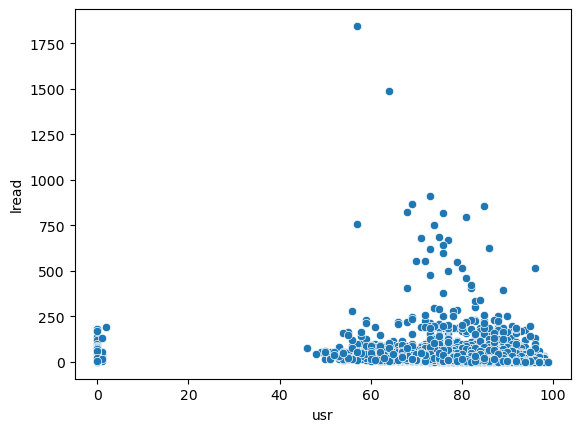

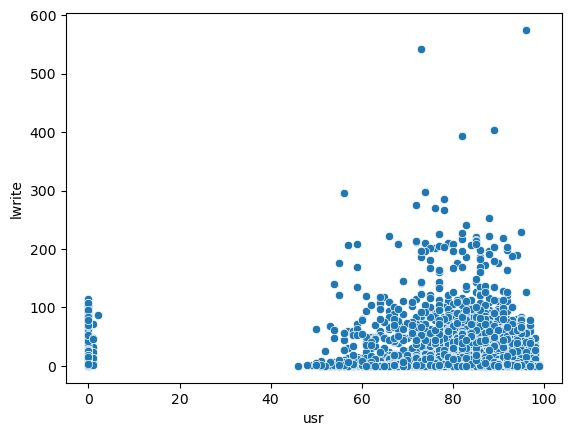

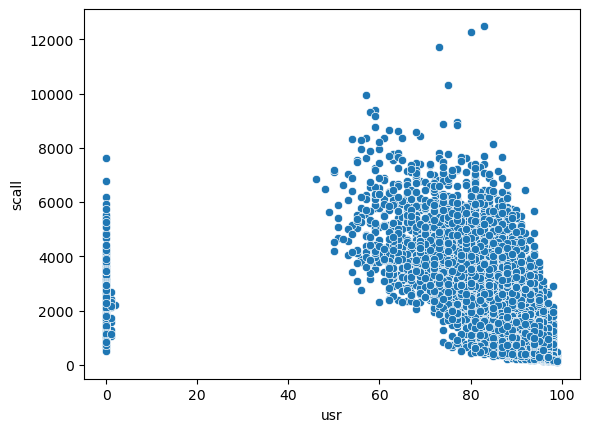

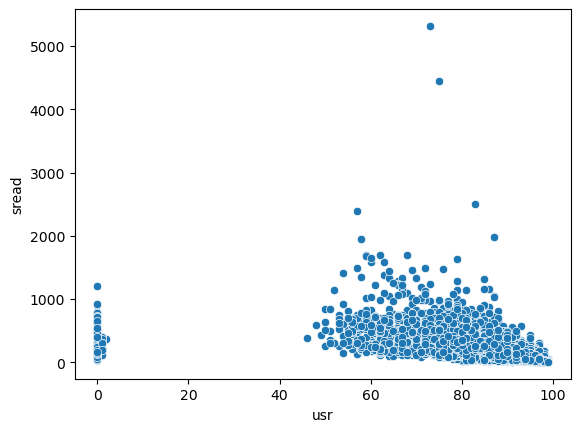

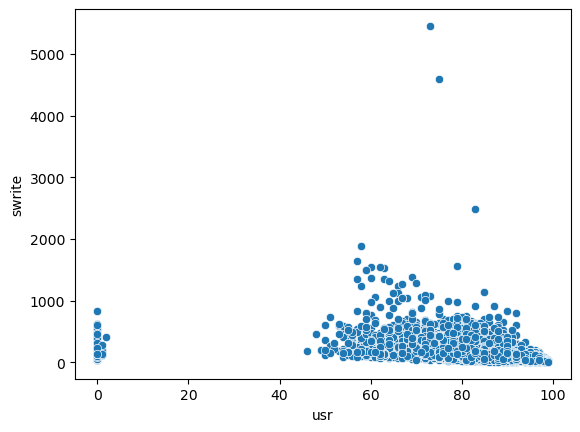

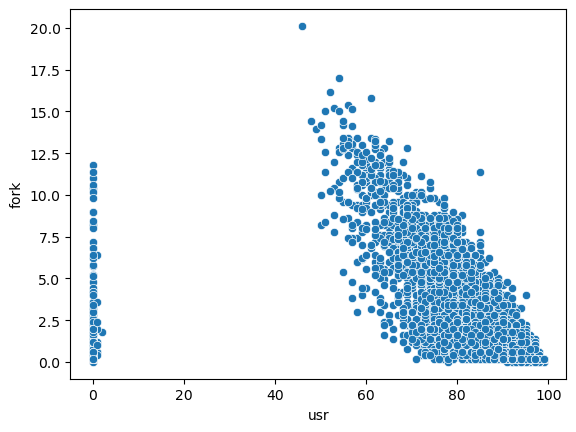

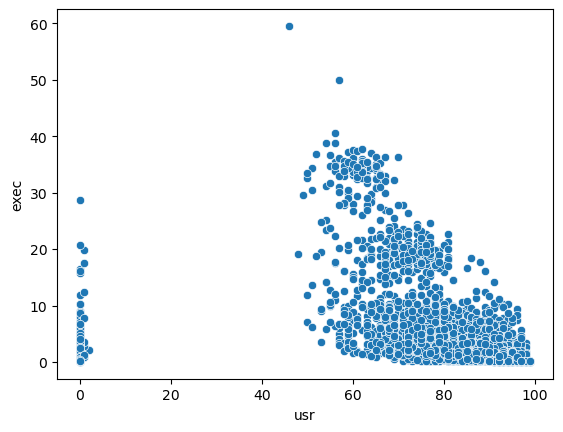

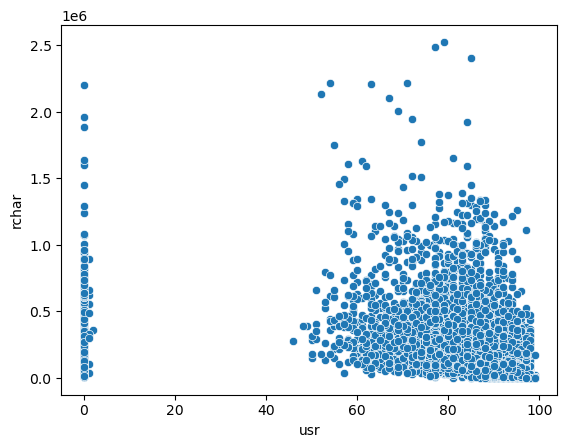

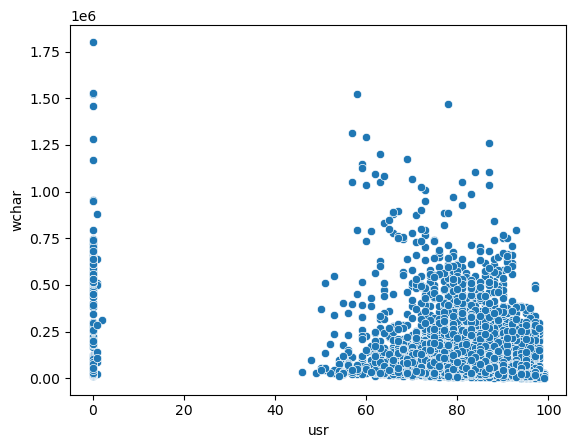

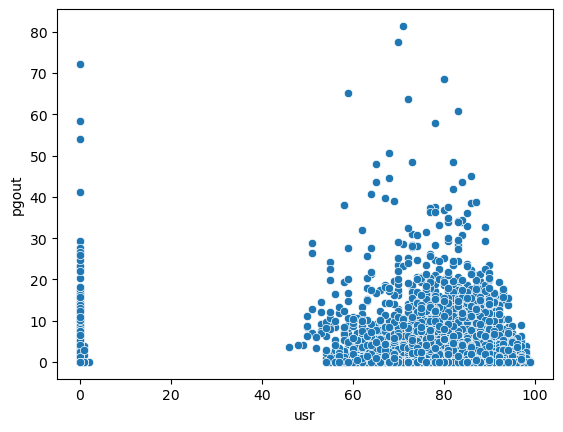

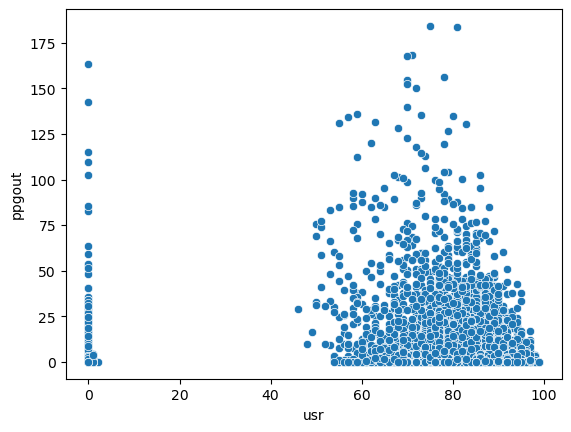

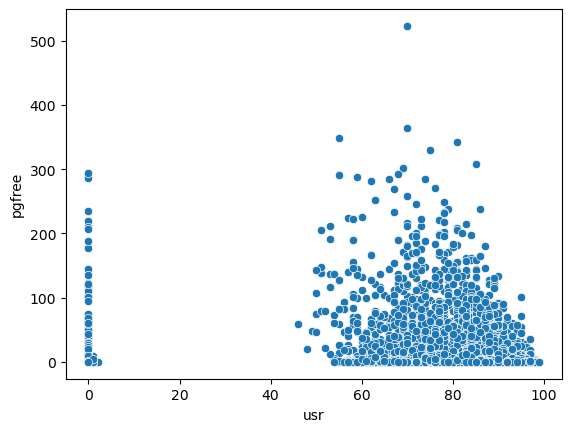

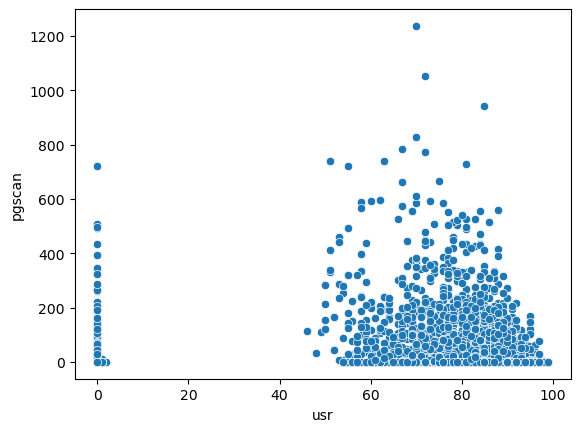

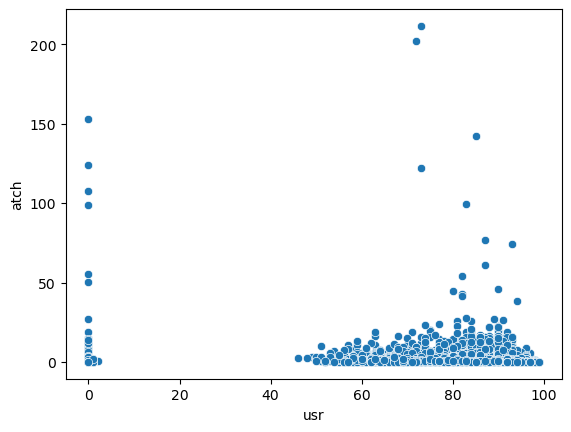

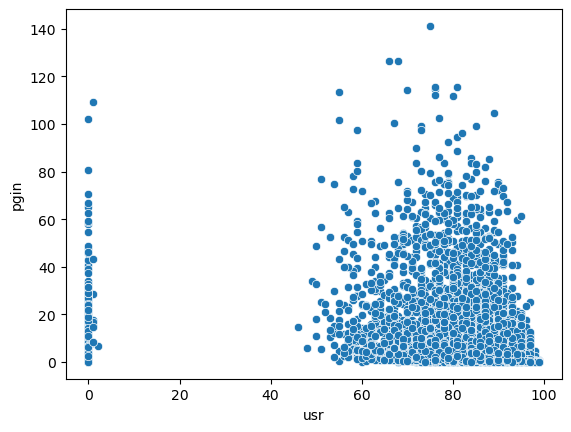

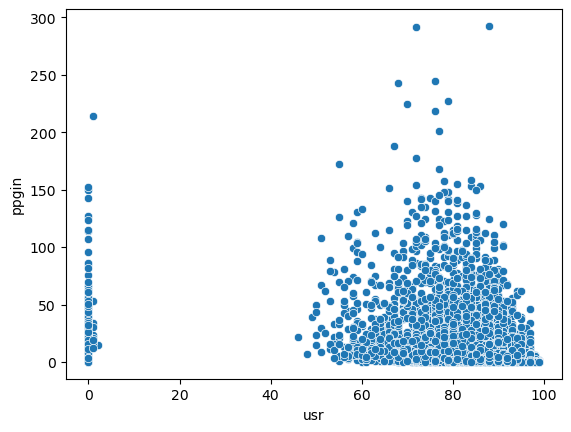

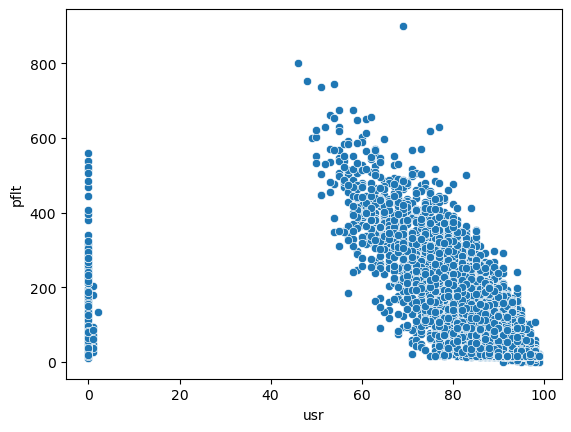

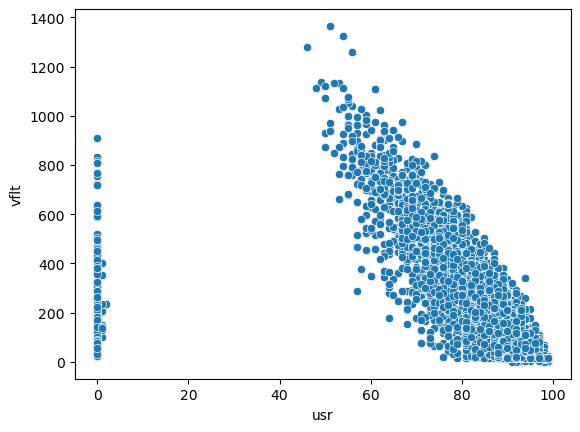

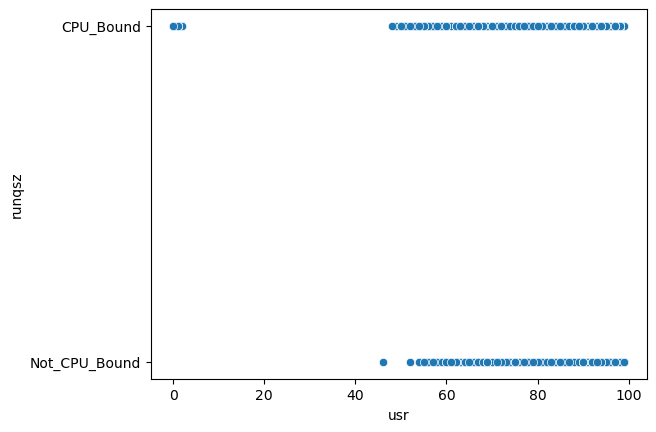

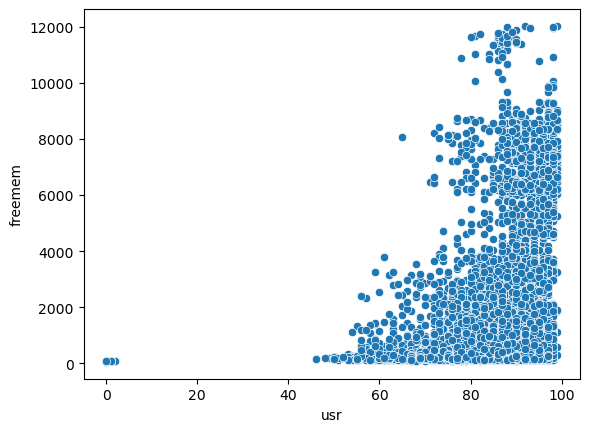

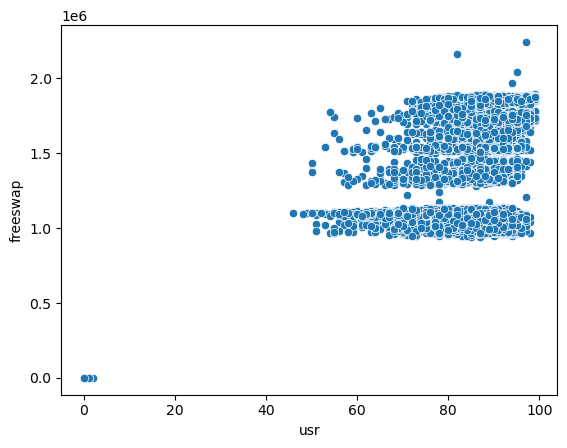

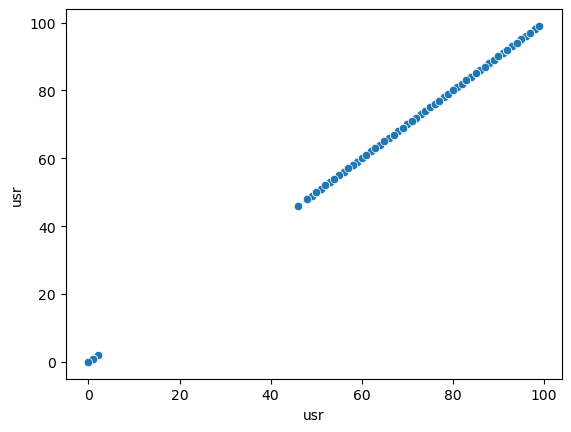

In [24]:
for column in df.columns:
    sns.scatterplot(data=df, x='usr', y=column)
    plt.show()

- No linear relationship is visible with independent variables.
- variables fork, pflt and vflt show slight linearity.
- The CPU running on user mode is either 0 or above 40% of the time.

### Bivariate Analysis

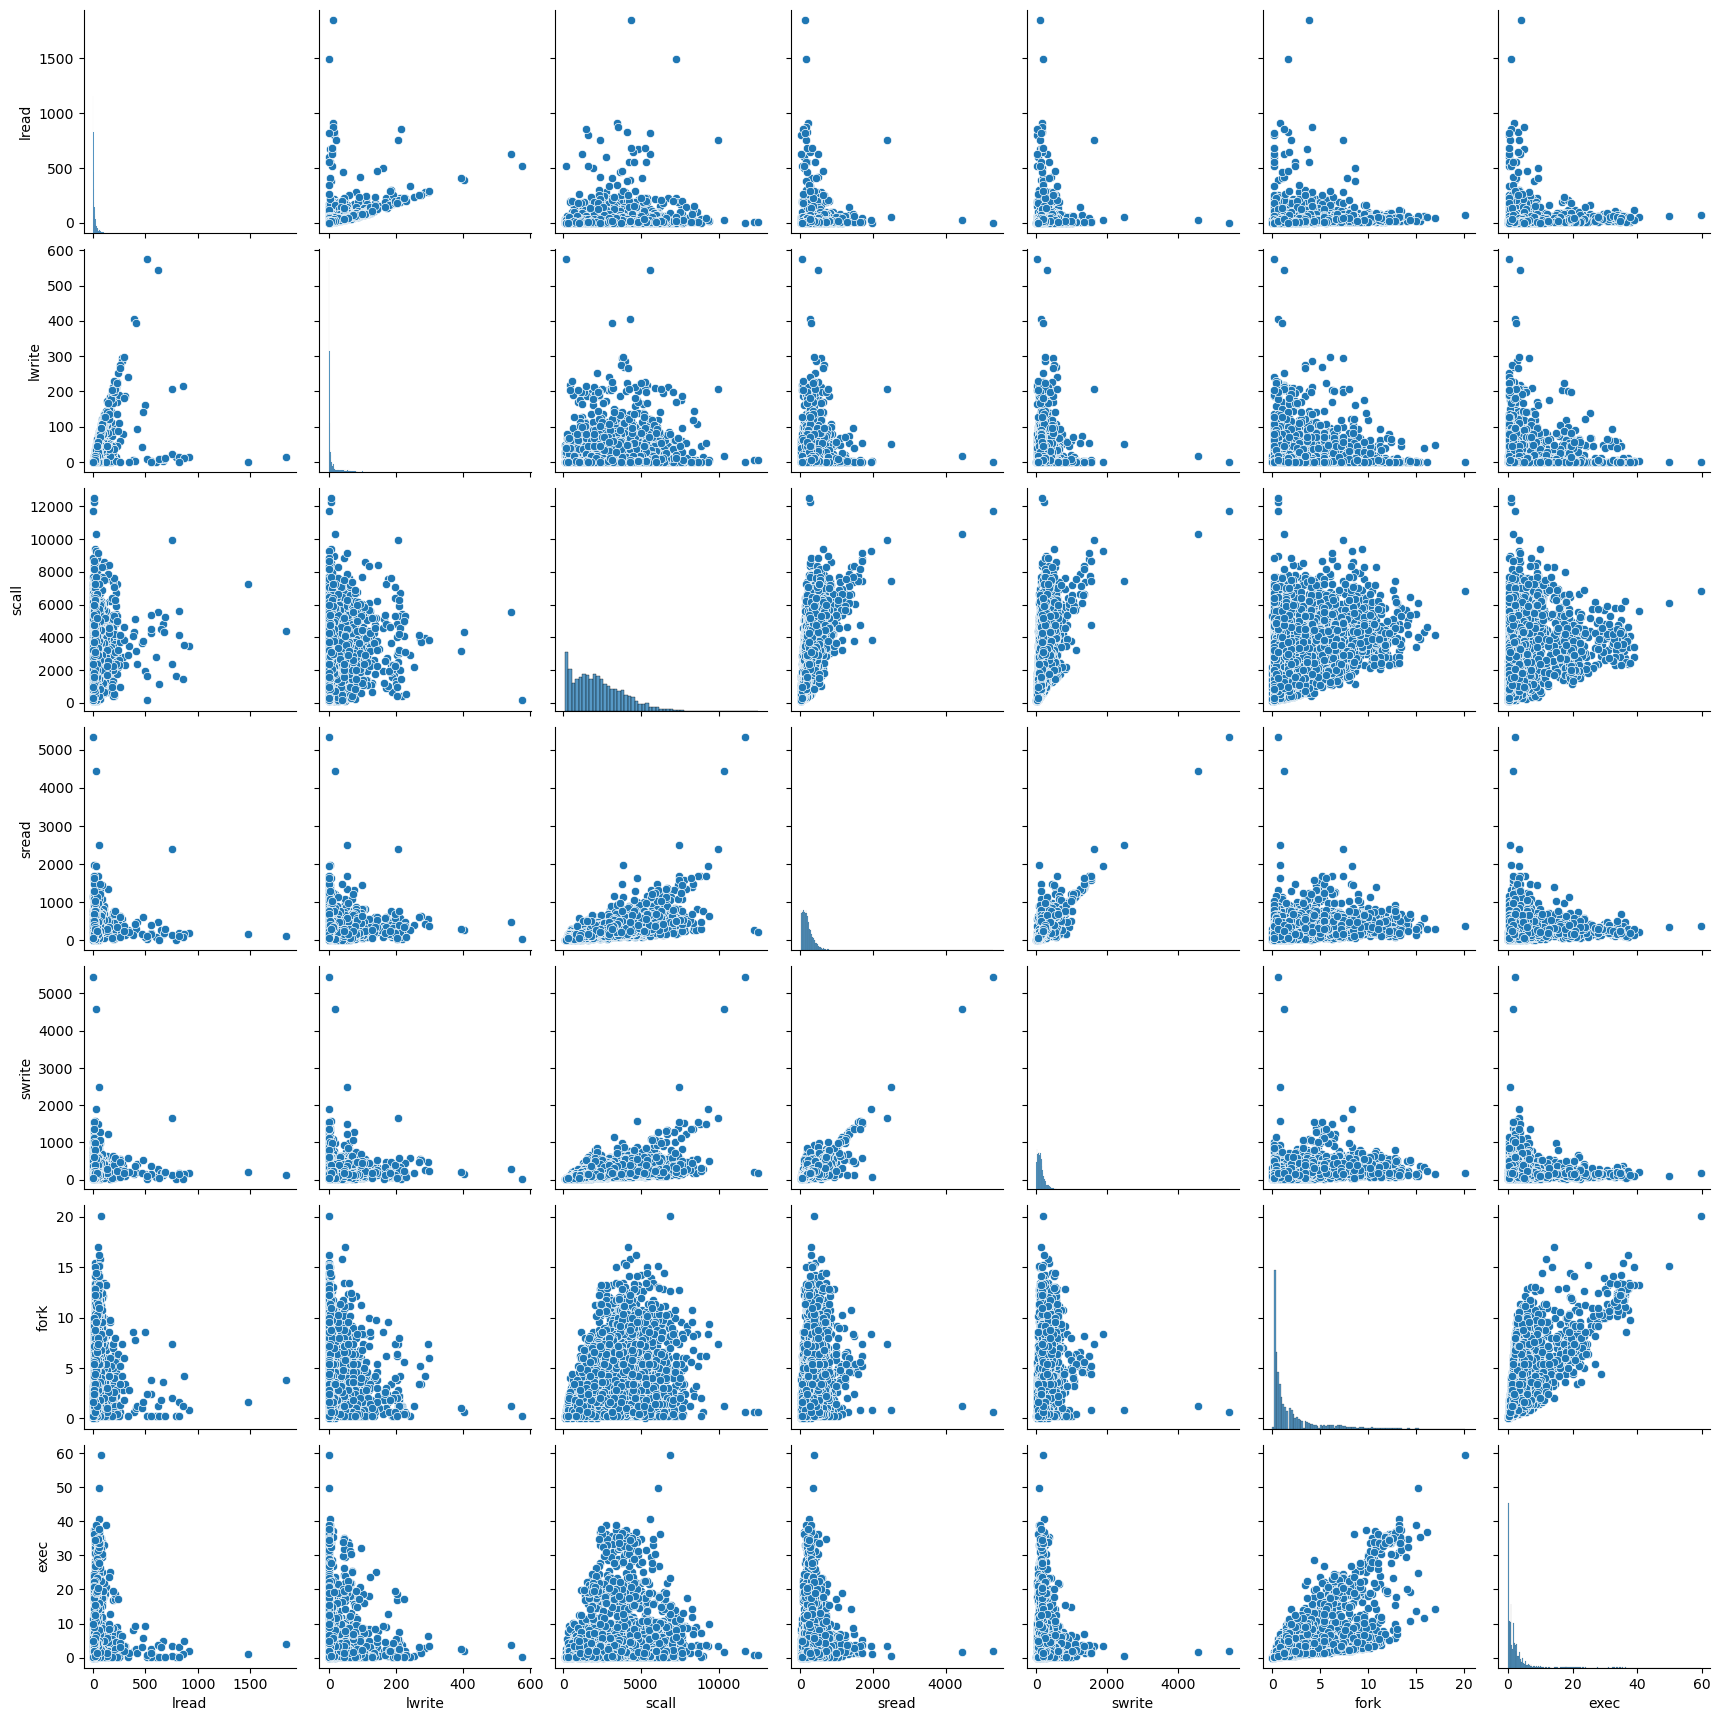

In [26]:
df_plot=df.iloc[:,0:7]
sns.pairplot(data=df_plot)

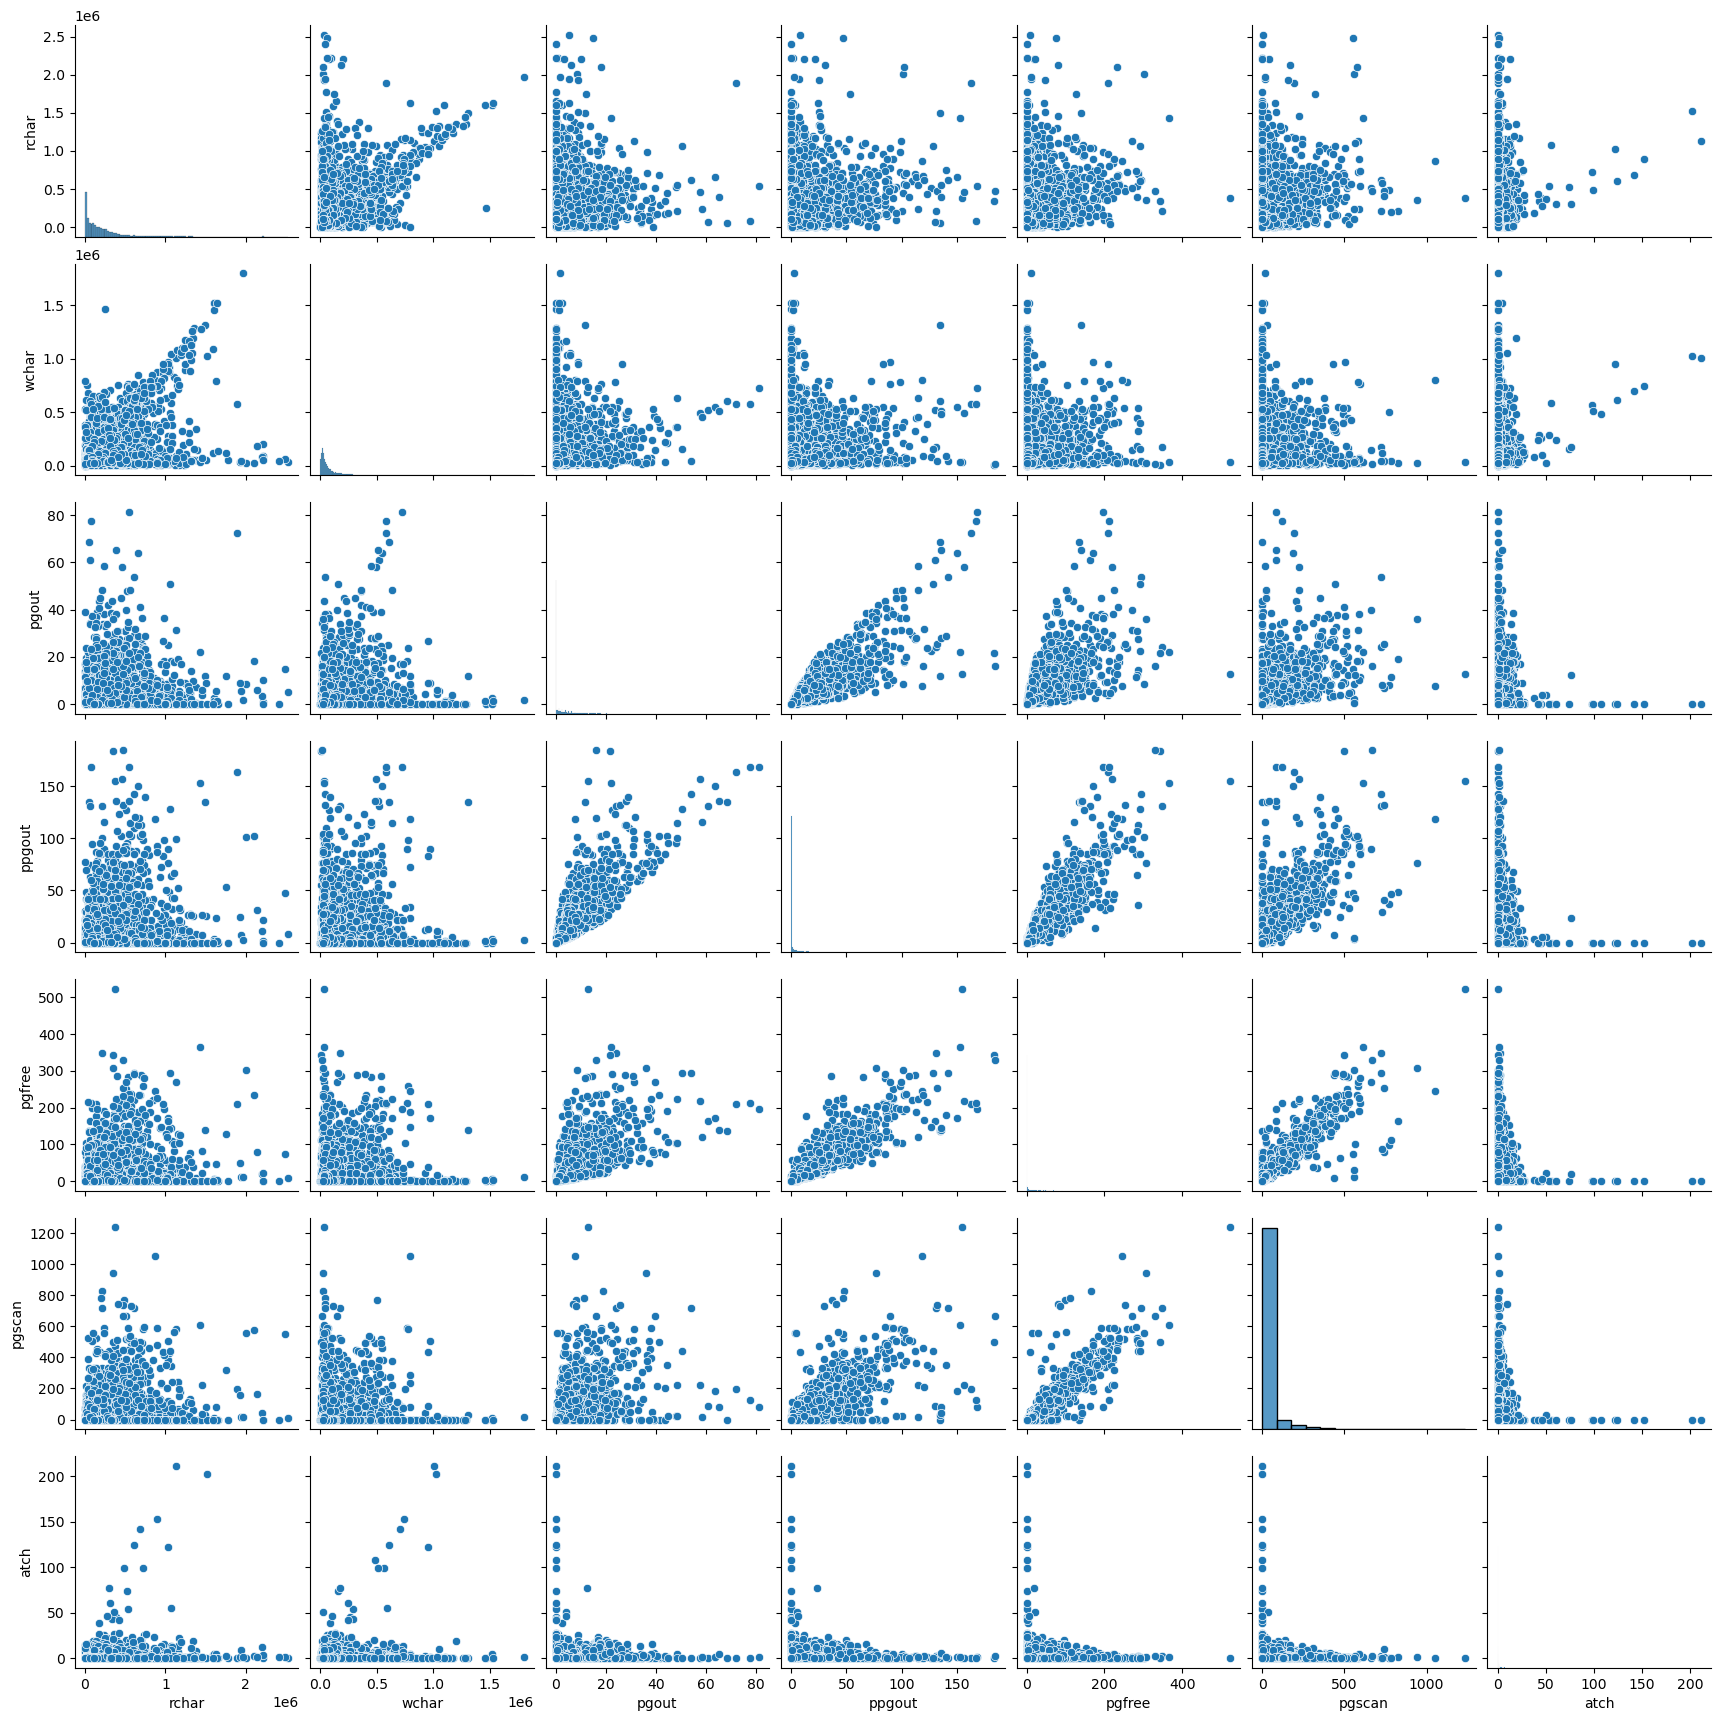

In [27]:
df_plot=df.iloc[:,7:14]
sns.pairplot(data=df_plot)

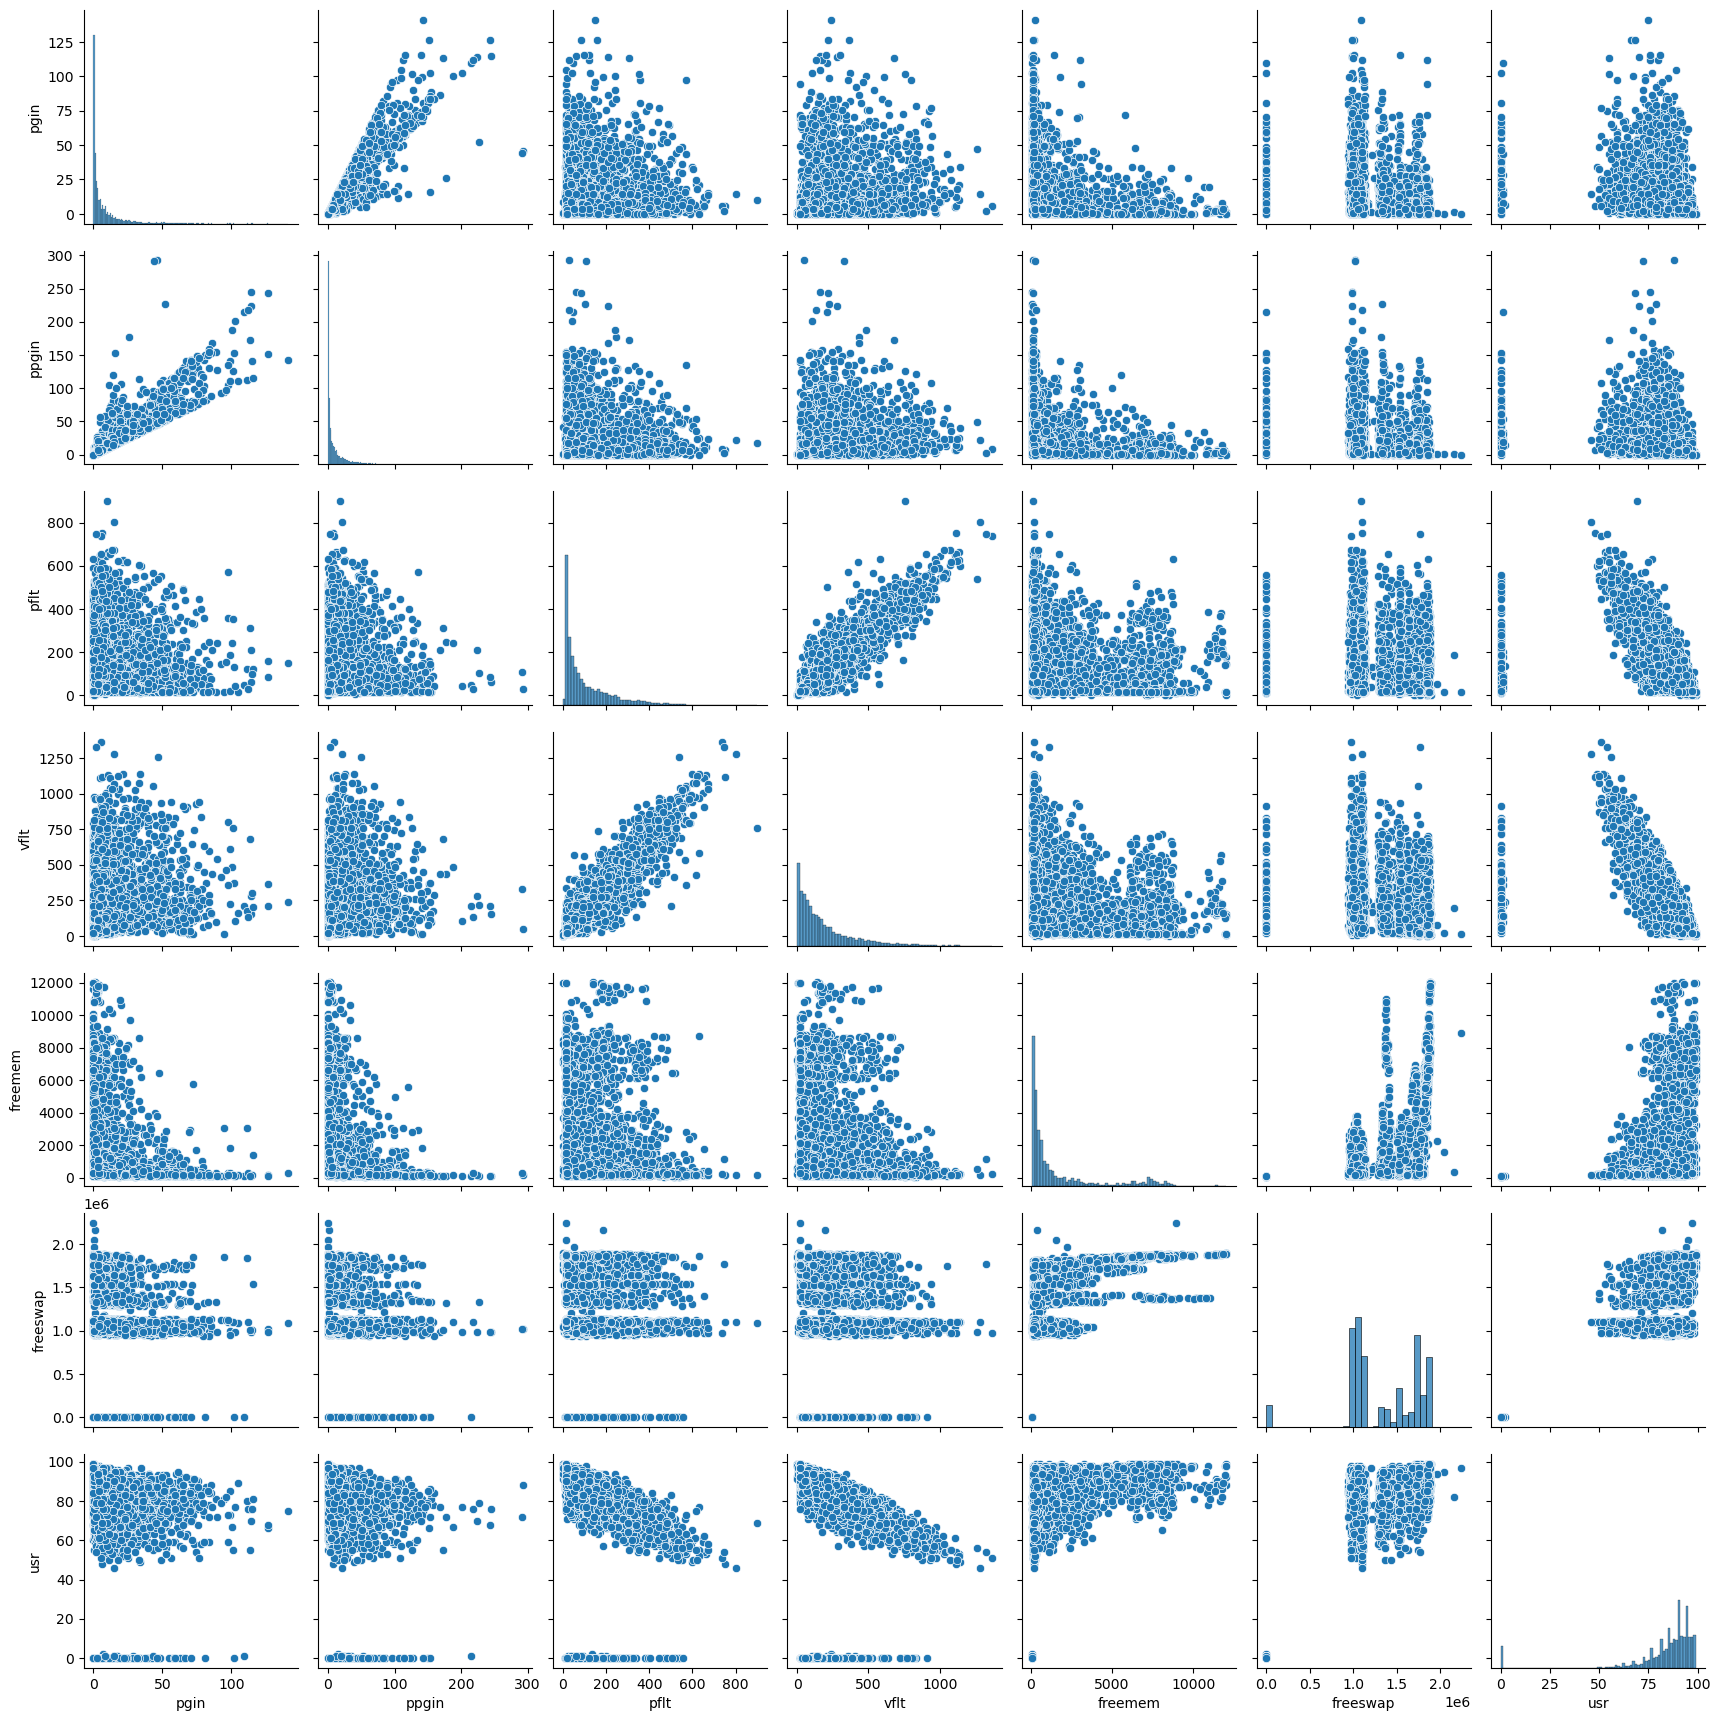

In [28]:
df_plot=df.iloc[:,14:22]
sns.pairplot(data=df_plot)

- No linear relationships can be seen in this dataset.

### Data Preprocessing

Imputing the median values of rchar and wchar to their corresponding null values

In [3]:
median_rchar= df['rchar'].median()
df['rchar']=df['rchar'].fillna(median_rchar)

In [4]:
median_wchar= df['wchar'].median()
df['wchar']=df['wchar'].fillna(median_wchar)

runqsz is a categorical variable having values CPU bound and CPU not bound , the values of CPU bound will be changed to 3 and for CPU not bound we will keep the values to be 1.

In [5]:
df['runqsz']= df['runqsz'].replace('Not_CPU_Bound',1)

In [6]:
df['runqsz']= df['runqsz'].replace('CPU_Bound',3)

In [7]:
df['runqsz'].value_counts()

1    4331
3    3861
Name: runqsz, dtype: int64

In [60]:
df.describe()

lread       lwrite         scall        sread       swrite  \
count  8192.000000  8192.000000   8192.000000  8192.000000  8192.000000   
mean     19.559692    13.106201   2306.318237   210.479980   150.058228   
std      53.353799    29.891726   1633.617322   198.980146   160.478980   
min       0.000000     0.000000    109.000000     6.000000     7.000000   
25%       2.000000     0.000000   1012.000000    86.000000    63.000000   
50%       7.000000     1.000000   2051.500000   166.000000   117.000000   
75%      20.000000    10.000000   3317.250000   279.000000   185.000000   
max    1845.000000   575.000000  12493.000000  5318.000000  5456.000000   

              fork         exec         rchar         wchar        pgout  ...  \
count  8192.000000  8192.000000  8.192000e+03  8.192000e+03  8192.000000  ...   
mean      1.884554     2.791998  1.964728e+05  9.581275e+04     2.285317  ...   
std       2.479493     5.212456  2.384460e+05  1.407285e+05     5.307038  ...   
min       0.000000     0.000000  2.780000e+02  1.498000e+03     0.000000  ...   
25%       0.400000     0.200000  3.486050e+04  2.297775e+04     0.000000  ...   
50%       0.800000     1.200000  1.254735e+05  4.661900e+04     0.000000  ...   
75%       2.200000     2.800000  2.653948e+05  1.060370e+05     2.400000  ...   
max      20.120000    59.560000  2.526649e+06  1.801623e+06    81.440000  ...   

            pgscan         atch         pgin        ppgin         pflt  \
count  8192.000000  8192.000000  8192.000000  8192.000000  8192.000000   
mean     21.526849     1.127505     8.277960    12.388586   109.793799   
std      71.141340     5.708347    13.874978    22.281318   114.419221   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.600000     0.600000    25.000000   
50%       0.000000     0.000000     2.800000     3.800000    63.800000   
75%       0.000000     0.600000     9.765000    13.800000   159.600000   
max    1237.000000   211.580000   141.200000   292.610000   899.800000   

              vflt       runqsz       freemem      freeswap          usr  
count  8192.000000  8192.000000   8192.000000  8.192000e+03  8192.000000  
mean    185.315796     1.942627   1763.456299  1.328126e+06    83.968872  
std     191.000603     0.998414   2482.104511  4.220194e+05    18.401905  
min       0.200000     1.000000     55.000000  2.000000e+00     0.000000  
25%      45.400000     1.000000    231.000000  1.042624e+06    81.000000  
50%     120.400000     1.000000    579.000000  1.289290e+06    89.000000  
75%     251.800000     3.000000   2002.250000  1.730380e+06    94.000000  
max    1365.000000     3.000000  12027.000000  2.243187e+06    99.000000  

[8 rows x 22 columns]

creating dummy variables for the column runqsz to avoid misconception.

In [8]:
df = pd.get_dummies(df, columns=["runqsz"])

In [9]:
df.head()

lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2   40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2     448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4  125473.5  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2  125473.5   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4  125473.5  12185.0    0.0   

   ...  atch  pgin  ppgin    pflt    vflt  freemem  freeswap  usr  runqsz_1  \
0  ...   0.0   1.6    2.6   16.00   26.40     4670   1730946   95         0   
1  ...   0.0   0.0    0.0   15.63   16.83     7278   1869002   97         1   
2  ...   1.2   6.0    9.4  150.20  220.20      702   1021237   87         1   
3  ...   0.0   0.2    0.2   15.60   16.80     7248   1863704   98         1   
4  ...   0.0   1.0    1.2   37.80   47.60      633   1760253   90         1   

   runqsz_3  
0         1  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

Here runqsz_3 is for CPU bound and runqsz is for NOT CPU bound .

- There are no missing values in the dataset.
- Null values of rchar and wchar have been imputed with its corresponding median values.
- runqsz has been converted into numerical datatype and true or false dummy variables have been created for the same.

### Split Data

In [10]:
X = df.drop("usr" , axis=1)

y = df.pop("usr")

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [66]:
X_train.head()

lread  lwrite  scall  sread  swrite  fork  exec     rchar     wchar  \
694       1       1   1345    223     192   0.6   0.6  198703.0  293578.0   
5535      1       1   1429     87      67   0.2   0.2    7163.0   24842.0   
4244     49      71   3273    225     180   0.6   0.4   83246.0   53705.0   
2472     13       8   4349    300     191   2.8   3.0   96009.0   70467.0   
7052     17      23    225     13      13   0.4   1.6   17132.0   12514.0   

      pgout  ...  pgscan  atch  pgin  ppgin    pflt    vflt  freemem  \
694    0.60  ...    56.4  2.60  3.80   7.40   28.20   56.60      121   
5535   0.00  ...     0.0  0.00  1.60   1.60   15.77   30.74     1476   
4244   5.39  ...     0.0  2.79  3.99   4.59   59.88   74.05       82   
2472   0.00  ...     0.0  0.00  2.80   3.20  129.00  236.80      772   
7052   0.00  ...     0.0  0.00  0.00   0.00   19.80   23.80     4179   

      freeswap  runqsz_1  runqsz_3  
694    1375446         0         1  
5535   1021541         1         0  
4244        18         0         1  
2472    993909         0         1  
7052   1821682         1         0  

[5 rows x 22 columns]

In [67]:
X_test.head()

lread  lwrite  scall  sread  swrite  fork  exec     rchar     wchar  \
3894     27      39   1252     53     118   0.2   0.2   26592.0   54394.0   
4276      1       0    996     85      55   0.4   0.4   16667.0   36431.0   
3414      9       7   1530    247     135   0.4   0.4   14513.0   61905.0   
4165     32       4   3243    182     140   5.2   5.6  337517.0   94832.0   
7385     16       3   5017    259     249   2.8   1.4   73537.0  237547.0   

      pgout  ...  pgscan  atch  pgin  ppgin    pflt    vflt  freemem  \
3894    0.0  ...     0.0   0.0   0.4    0.6   19.44   20.04     7762   
4276    0.0  ...     0.0   0.0   1.0    1.4   35.53   52.10     2979   
3414   13.8  ...    24.2  10.4  14.8   18.4   26.80  186.20       89   
4165    0.8  ...     0.0   1.4   4.6    7.0  250.60  420.20     1300   
7385    0.0  ...     0.0   0.0   5.6    5.8  142.80  276.20     2114   

      freeswap  runqsz_1  runqsz_3  
3894   1875466         1         0  
4276   1010114         1         0  
3414        11         0         1  
4165   1535309         0         1  
7385    988600         0         1  

[5 rows x 22 columns]

### Model Building

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()
model.fit(X, y)
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

Intercept: 46.81436476912372
Coefficient: [-1.98149459e-02  7.44478334e-03  1.03150583e-03 -9.74949564e-05
 -1.57277584e-03 -1.88706603e+00 -4.15836067e-02 -3.65680175e-06
 -1.06623430e-05 -2.04798176e-01  1.27014927e-01 -8.79943726e-02
  1.25131169e-02 -3.96012547e-02  5.80643759e-02 -3.92115685e-02
 -4.00985194e-02  2.27945997e-02 -1.66418070e-03  3.32481137e-05
  3.97375730e+00 -3.97375730e+00]


In [14]:
import statsmodels.api as sm
model = sm.OLS(y, X)
results = model.fit()

In [17]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     692.0
Date:                Fri, 16 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:33:09   Log-Likelihood:                -31296.
No. Observations:                8192   AIC:                         6.264e+04
Df Residuals:                    8170   BIC:                         6.279e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lread         -0.0198      0.003     -7.088      0.0

From the above results summary:
- pvalues of variables having less than 0.05 can be considered as significant variables.
- lread,lwrite,scall,fork,rchar,wchar,pgout,ppgout,pgfree,pgscan,pgin,ppgin,pflt,vflt,freemem,freeswap,runqsz_1,runqsz_3 are the significant variables.

Linear regression on train and test.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

Finding R-squared value, RMSE value and Adjusted R squared value on both train and test splits.

In [16]:
train_r2 = r2_score(y_train, train_predictions)
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
n_train = len(X_train)
p_train = len(model.coef_)
train_adj_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p_train - 1)
print("Training Set:")
print("R-squared:", train_r2)
print("RMSE:", train_rmse)
print("Adjusted R-squared:", train_adj_r2)

Training Set:
R-squared: 0.6428396267060906
RMSE: 10.813213974052196
Adjusted R-squared: 0.6414637681502395


In [17]:
test_r2 = r2_score(y_test, test_predictions)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
n_test = len(X_test)
p_test = len(model.coef_)
test_adj_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p_test - 1)
print("\nTest Set:")
print("R-squared:", test_r2)
print("RMSE:", test_rmse)
print("Adjusted R-squared:", test_adj_r2)



Test Set:
R-squared: 0.631217100611971
RMSE: 11.594013992326564
Adjusted R-squared: 0.6278851811924487


For Training set:
- R-squared value is 0.64 which means 64% of the variance of the dependent variables is explained by the independent variables.
- The RMSE value is 10.81 which means there is an average difference of 10.81 from the actual and predicted variables.
- Adjusted R square value is 0.64 which is similar to the r squared value hence the model does not suffer from unnecessary overfitting.
- It means that the predictor variables are relevant in the model.

For Testing set:
- R-squared value is 0.63 which means 63% of the variance of the dependent variables is explained by the independent variables.
- The RMSE value is 11.59 which means there is an average difference of 11.59 from the actual and predicted variables.
- Adjusted R square value is 0.62 which is similar to the r squared value hence the model does not suffer from unnecessary overfitting.
- It means that the predictor variables are relevant in the model.

- The models performance is consistent when compared to the train and test split data.
- Both the model captures a moderate amount of variance of the dependent variable about 64%.
- The level of error is also moderate in the sets.
- Hence the model generalises well to unseen data.

#### Linear equation of the final model.

In [18]:
model = LinearRegression()
model.fit(X, y)
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

Intercept: 46.81436476912372
Coefficient: [-1.98149459e-02  7.44478334e-03  1.03150583e-03 -9.74949564e-05
 -1.57277584e-03 -1.88706603e+00 -4.15836067e-02 -3.65680175e-06
 -1.06623430e-05 -2.04798176e-01  1.27014927e-01 -8.79943726e-02
  1.25131169e-02 -3.96012547e-02  5.80643759e-02 -3.92115685e-02
 -4.00985194e-02  2.27945997e-02 -1.66418070e-03  3.32481137e-05
  3.97375730e+00 -3.97375730e+00]


In [25]:
independent_var=X.columns

In [26]:
independent_var

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem', 'freeswap', 'runqsz_1', 'runqsz_3'],
      dtype='object')

In [34]:
linear_equation = f'y = {model.intercept_:.2f}'

In [35]:
for i, coef in enumerate(model.coef_):
    linear_equation += f' + {coef:.2f} * {independent_var[i]}'

print("Linear Equation:", linear_equation)

Linear Equation: y = 46.81 + -0.02 * lread + 0.01 * lwrite + 0.00 * scall + -0.00 * sread + -0.00 * swrite + -1.89 * fork + -0.04 * exec + -0.00 * rchar + -0.00 * wchar + -0.20 * pgout + 0.13 * ppgout + -0.09 * pgfree + 0.01 * pgscan + -0.04 * atch + 0.06 * pgin + -0.04 * ppgin + -0.04 * pflt + 0.02 * vflt + -0.00 * freemem + 0.00 * freeswap + 3.97 * runqsz_1 + -3.97 * runqsz_3


From the above equation we can say that variables 'fork','pgout','ppgout','runqsz_1','runqsz_3' has most significance in the equation.

### Actionable insights and recommendations

- Fork is the process which creates a new space for a new task, basically a process which is used while in multitasking hence multitasking and initiating new process can increase the fork hence usr mode.
- pgout and ppgout are number of page out requests and number of pages paged out request which enables the system to run in user mode.
- runqsz is also similar to fork where it is a queue that is waiting for a CPU to run.

#### Hence the process which are asked by the user to be done by the computer will make the CPU run more on User bound while other parameters like kernal base codes or being idle will not  come under user bound time.

## Problem 2

In [40]:
df1=pd.read_excel('Contraceptive_method_dataset.xlsx')

1. Wife's age (numerical)
2. Wife's education (categorical) 1=uneducated, 2, 3, 4=tertiary
3. Husband's education (categorical) 1=uneducated, 2, 3, 4=tertiary
4. Number of children ever born (numerical)
5. Wife's religion (binary) Non-Scientology, Scientology
6. Wife's now working? (binary) Yes, No
7. Husband's occupation (categorical) 1, 2, 3, 4(random)
8. Standard-of-living index (categorical) 1=verlow, 2, 3, 4=high
9. Media exposure (binary) Good, Not good
10. Contraceptive method used (class attribute) No,Yes

In [37]:
df1.head()

Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0         Primary         Secondary                  3.0   
1      45.0      Uneducated         Secondary                 10.0   
2      43.0         Primary         Secondary                  7.0   
3      42.0       Secondary           Primary                  9.0   
4      36.0       Secondary         Secondary                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0   Scientology           No                   2                     High   
1   Scientology           No                   3                Very High   
2   Scientology           No                   3                Very High   
3   Scientology           No                   3                     High   
4   Scientology           No                   3                      Low   

  Media_exposure  Contraceptive_method_used  
0         Exposed                        No  
1         Exposed                        No  
2         Exposed                        No  
3         Exposed                        No  
4         Exposed                        No

In [38]:
df1.shape

(1473, 10)

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [40]:
df1.describe()

Wife_age  No_of_children_born  Husband_Occupation
count  1402.000000          1452.000000         1473.000000
mean     32.606277             3.254132            2.137814
std       8.274927             2.365212            0.864857
min      16.000000             0.000000            1.000000
25%      26.000000             1.000000            1.000000
50%      32.000000             3.000000            2.000000
75%      39.000000             4.000000            3.000000
max      49.000000            16.000000            4.000000

### EDA

In [46]:
df1['Wife_ education'].value_counts()

Tertiary      577
Secondary     410
Primary       334
Uneducated    152
Name: Wife_ education, dtype: int64

In [47]:
df1['Husband_education'].value_counts()

Tertiary      899
Secondary     352
Primary       178
Uneducated     44
Name: Husband_education, dtype: int64

In [48]:
df1['Wife_religion'].value_counts()

Scientology        1253
Non-Scientology     220
Name: Wife_religion, dtype: int64

In [49]:
df1['Wife_Working'].value_counts()

No     1104
Yes     369
Name: Wife_Working, dtype: int64

In [50]:
df1['Standard_of_living_index'].value_counts()

Very High    684
High         431
Low          229
Very Low     129
Name: Standard_of_living_index, dtype: int64

In [52]:
df1['Media_exposure '].value_counts()

Exposed        1364
Not-Exposed     109
Name: Media_exposure , dtype: int64

In [53]:
df1['Contraceptive_method_used'].value_counts()

Yes    844
No     629
Name: Contraceptive_method_used, dtype: int64

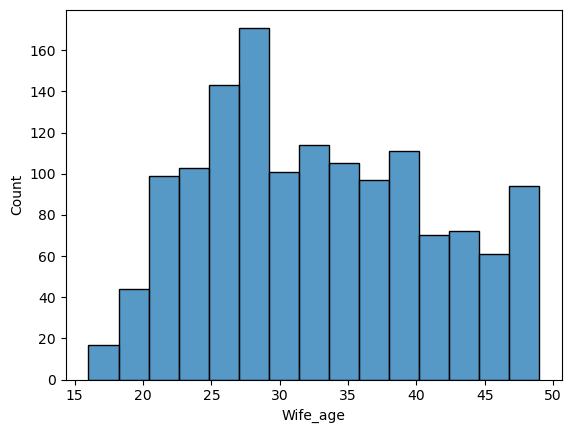

In [57]:
sns.histplot(data=df1,x='Wife_age');

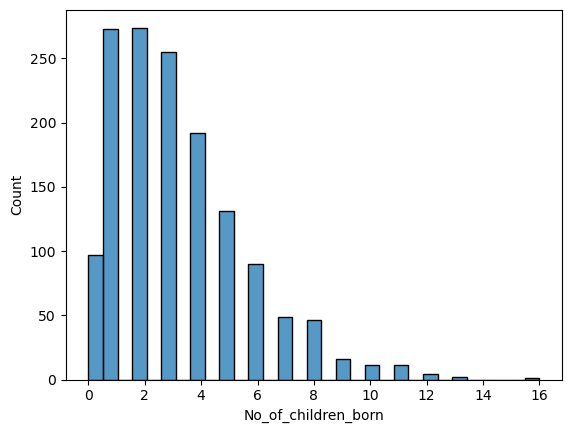

In [58]:
sns.histplot(data=df1,x='No_of_children_born');

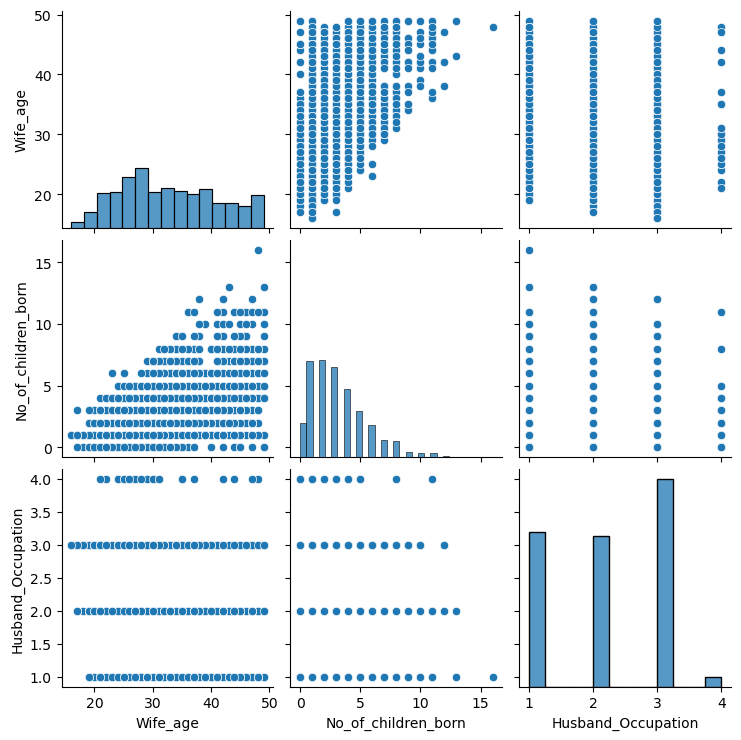

In [61]:
sns.pairplot(data=df1)

<Axes: xlabel='No_of_children_born', ylabel='Standard_of_living_index'>

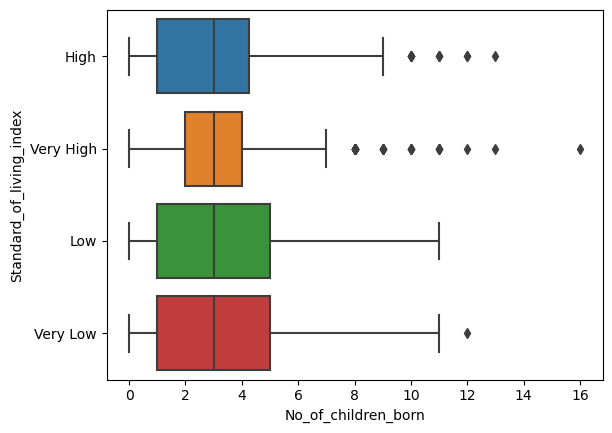

In [65]:
sns.boxplot(data=df1,x='No_of_children_born',y='Standard_of_living_index')

<Axes: xlabel='No_of_children_born', ylabel='Contraceptive_method_used'>

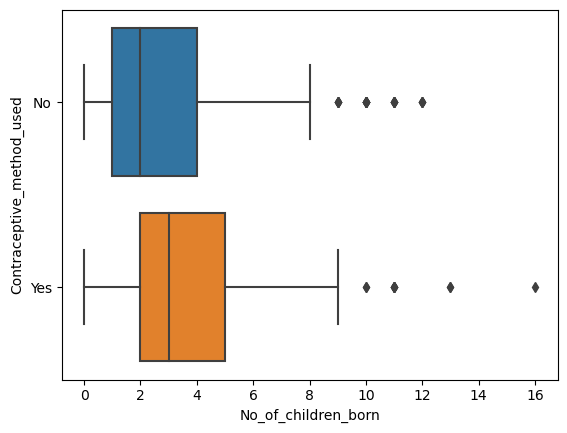

In [66]:
sns.boxplot(data=df1,x='No_of_children_born',y='Contraceptive_method_used')

<Axes: xlabel='Wife_age', ylabel='Contraceptive_method_used'>

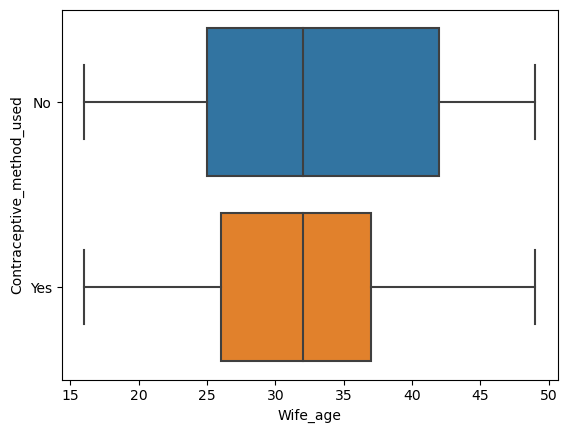

In [67]:
sns.boxplot(data=df1,x='Wife_age',y='Contraceptive_method_used')

In [43]:
df1.groupby('Contraceptive_method_used')['Wife_age'].nunique()

Contraceptive_method_used
No     34
Yes    34
Name: Wife_age, dtype: int64

<Axes: xlabel='Husband_Occupation', ylabel='Contraceptive_method_used'>

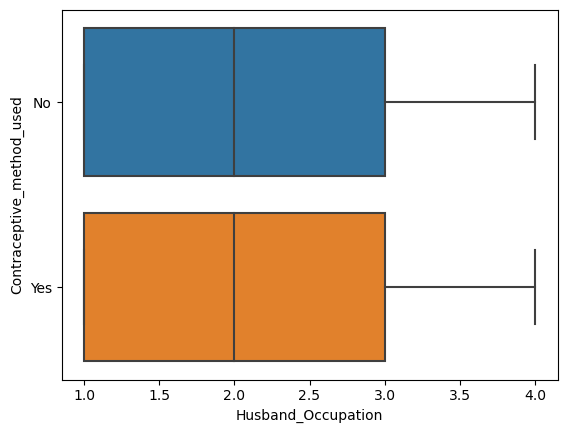

In [70]:
sns.boxplot(data=df1,x='Husband_Occupation',y='Contraceptive_method_used')

<Axes: xlabel='Wife_age', ylabel='Media_exposure '>

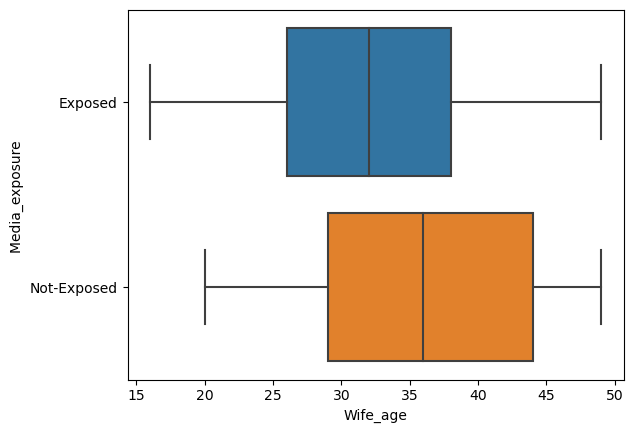

In [73]:
sns.boxplot(data=df1,x='Wife_age',y='Media_exposure ')

<Axes: xlabel='Husband_education', ylabel='No_of_children_born'>

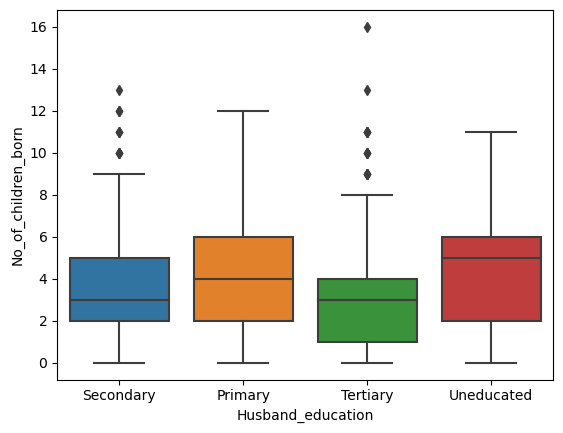

In [74]:
sns.boxplot(data=df1,x='Husband_education',y='No_of_children_born')

From the above plots and analysis,
- Wifes age start from 16 upto 49
- No of children born starts from 0 and has very large values like 16.
- From the pairplot we can see that no pattern is observed hence there are no relavant relationship between husband occupation,wifes age and number of children.
- We can see that the number of children does not depend on the standard of living but for people with high standard of living number of children are less when compared to lower standard of living.
- Even if contraceptive measures were used the number of children are same in both the cases.
- Media exposure is equal irrespective of change in age.
- Education level of husbands doesnt effect on the number of children born.

### Data Pre-Processing

Imputing null values in the dataset.

In [75]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [6]:
median_age= df1['Wife_age'].median()
df1['Wife_age']=df1['Wife_age'].fillna(median_age)

In [7]:
median_age= df1['No_of_children_born'].median()
df1['No_of_children_born']=df1['No_of_children_born'].fillna(median_age)

Converting categorical variables into numerical datatype

In [8]:
df1['Wife_ education']=df1['Wife_ education'].replace('Uneducated',1)
df1['Wife_ education']=df1['Wife_ education'].replace('Primary',2)
df1['Wife_ education']=df1['Wife_ education'].replace('Secondary',3)
df1['Wife_ education']=df1['Wife_ education'].replace('Tertiary',4)

In [9]:
df1['Husband_education']=df1['Husband_education'].replace('Uneducated',1)
df1['Husband_education']=df1['Husband_education'].replace('Primary',2)
df1['Husband_education']=df1['Husband_education'].replace('Secondary',3)
df1['Husband_education']=df1['Husband_education'].replace('Tertiary',4)

In [10]:
df1['Wife_religion']=df1['Wife_religion'].replace('Non-Scientology',0)
df1['Wife_religion']=df1['Wife_religion'].replace('Scientology',1)

In [11]:
df1['Wife_Working']=df1['Wife_Working'].replace('No',0)
df1['Wife_Working']=df1['Wife_Working'].replace('Yes',1)

In [12]:
df1['Standard_of_living_index']=df1['Standard_of_living_index'].replace('Very Low',1)
df1['Standard_of_living_index']=df1['Standard_of_living_index'].replace('Low',2)
df1['Standard_of_living_index']=df1['Standard_of_living_index'].replace('High',3)
df1['Standard_of_living_index']=df1['Standard_of_living_index'].replace('Very High',4)

In [13]:
df1['Media_exposure ']=df1['Media_exposure '].replace('Not-Exposed',0)
df1['Media_exposure ']=df1['Media_exposure '].replace('Exposed',1)

In [14]:
df1['Contraceptive_method_used']=df1['Contraceptive_method_used'].replace('No',0)
df1['Contraceptive_method_used']=df1['Contraceptive_method_used'].replace('Yes',1)

In [15]:
df1.head()

Wife_age  Wife_ education  Husband_education  No_of_children_born  \
0      24.0                2                  3                  3.0   
1      45.0                1                  3                 10.0   
2      43.0                2                  3                  7.0   
3      42.0                3                  2                  9.0   
4      36.0                3                  3                  8.0   

   Wife_religion  Wife_Working  Husband_Occupation  Standard_of_living_index  \
0              1             0                   2                         3   
1              1             0                   3                         4   
2              1             0                   3                         4   
3              1             0                   3                         3   
4              1             0                   3                         2   

   Media_exposure   Contraceptive_method_used  
0                1                          0  
1                1                          0  
2                1                          0  
3                1                          0  
4                1                          0

#### Train-Test Split

In [16]:
X = df1.drop("Contraceptive_method_used" , axis=1)

y = df1.pop("Contraceptive_method_used")

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

### Model Building

### 1) Logistic Regression

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [128]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\arjun\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [126]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6832579185520362
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.48      0.57       193
           1       0.68      0.84      0.75       249

    accuracy                           0.68       442
   macro avg       0.69      0.66      0.66       442
weighted avg       0.69      0.68      0.67       442

Confusion Matrix:
[[ 93 100]
 [ 40 209]]


AUC: 0.714


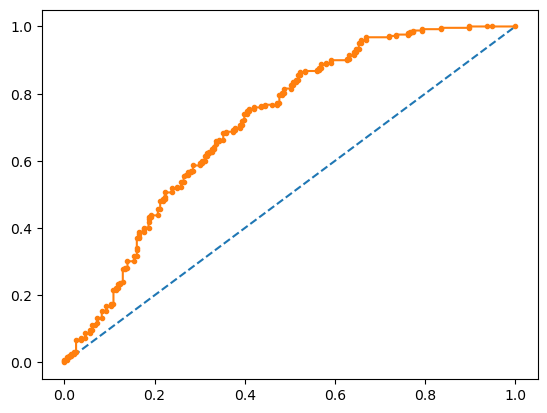

In [130]:
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#### From the above logistic regression:
- The accuracy of the model is 0.68 that means about 68% of the predictions are correct for the test data.
- Precision for class 0 is 0.7 which means about 70% of the predictions of class 0 are correct and precision for class 1 is 0.68 which means that about 68% of the predictions of class 1 are correct.
- From the confusion matrix 302 values are correctly predicted while 140 are incorrectly predicted.
- The precision of predicting class 0 is higher than predicting class 1 but the recall for predicting class 1 is much higher than predicting class 0.
- The total number of class 0 is lesser when compared to class 1 which is class imbalance.
- The AUC score is 0.71 which means the distinguishing between the class is not so very good and can be improved.
- The ROC curve is also close to the diagonal line which means the classification is similar to a random guessing.

### 2) LDA Model

In [135]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [136]:
y_pred = lda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6855203619909502
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.48      0.57       193
           1       0.68      0.85      0.75       249

    accuracy                           0.69       442
   macro avg       0.69      0.66      0.66       442
weighted avg       0.69      0.69      0.67       442

Confusion Matrix:
[[ 92 101]
 [ 38 211]]


AUC: 0.712


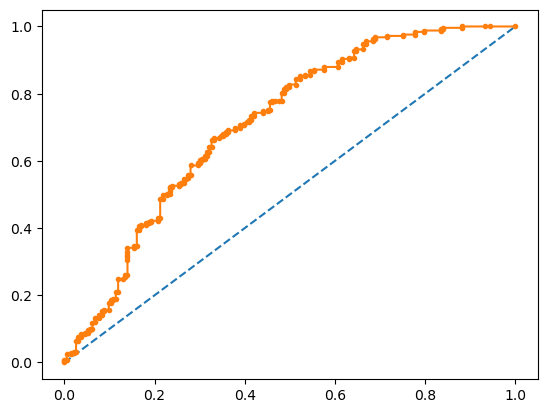

In [137]:
probs = lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

From the above LDA:
- The precision, recall and accuracy of the model is exactly the same as that of the logidtic regression.
- The number of classification of 1 and 0 are also same as that of the Logistic regression.
- The AUC score is same as well as ROC curve is also similar.

### 3) CART Model

In [34]:
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier(criterion = 'gini')
cart.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Credit_Tree_File = open('d:\credit_tree.dot','w')
dot_data = tree.export_graphviz(cart, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()

In [25]:
print (pd.DataFrame(cart.feature_importances_, columns = ["Imp"], index = X_train.columns))

                               Imp
Wife_age                  0.347049
Wife_ education           0.084039
Husband_education         0.044396
No_of_children_born       0.244199
Wife_religion             0.041993
Wife_Working              0.040691
Husband_Occupation        0.093230
Standard_of_living_index  0.086374
Media_exposure            0.018029


#### Regularising the Tree

In [27]:
reg_cart = DecisionTreeClassifier(criterion = 'gini', max_depth = 7,min_samples_leaf=10,min_samples_split=30)
reg_cart.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=30)

In [29]:
credit_tree_regularized = open('d:\credit_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_cart, out_file= credit_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

credit_tree_regularized.close()

print (pd.DataFrame(cart.feature_importances_, columns = ["Imp"], index = X_train.columns))

                               Imp
Wife_age                  0.347049
Wife_ education           0.084039
Husband_education         0.044396
No_of_children_born       0.244199
Wife_religion             0.041993
Wife_Working              0.040691
Husband_Occupation        0.093230
Standard_of_living_index  0.086374
Media_exposure            0.018029


In [35]:
y_pred = cart.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.667420814479638
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.60      0.61       193
           1       0.70      0.72      0.71       249

    accuracy                           0.67       442
   macro avg       0.66      0.66      0.66       442
weighted avg       0.67      0.67      0.67       442

Confusion Matrix:
[[115  78]
 [ 69 180]]


AUC: 0.666


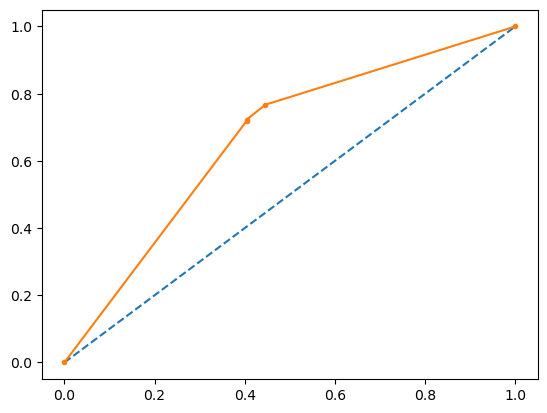

In [36]:
probs = cart.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

- The overall accuracy of the model is 0.66.
- The precision and the recall values of 0 are 0.62 and 0.60.
- The precision and the recall values of 1 are 0.70 and 0.72.
- The classification of 0 and 1 are 193 and 249.
- From the confusion matrix the True positives are 115 , True negatives are 180, False positives are 78 and False negatives are 69.
- The AUC value is 0.666 , and the ROC curve is very close to the imaginary line.

#### Model performance on Test data

In [30]:
y_pred = reg_cart.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7036199095022625
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.54      0.61       193
           1       0.70      0.83      0.76       249

    accuracy                           0.70       442
   macro avg       0.71      0.69      0.69       442
weighted avg       0.71      0.70      0.70       442

Confusion Matrix:
[[104  89]
 [ 42 207]]


AUC: 0.748


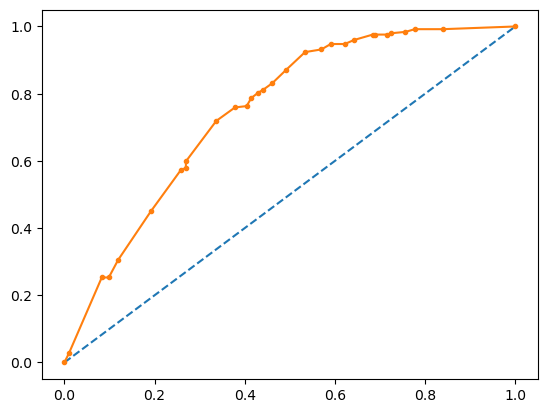

In [31]:
probs = reg_cart.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#### Model performance on Train data

In [32]:
y_pred = reg_cart.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_train, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred))

Accuracy: 0.7478176527643065
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.61      0.67       436
           1       0.75      0.85      0.80       595

    accuracy                           0.75      1031
   macro avg       0.75      0.73      0.73      1031
weighted avg       0.75      0.75      0.74      1031

Confusion Matrix:
[[266 170]
 [ 90 505]]


AUC: 0.807


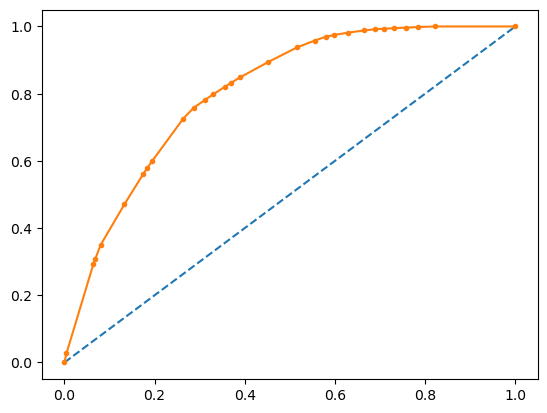

In [33]:
probs = reg_cart.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

From the above cart model:
- From the desicion tree without pruning the data was overfitted, it was complex, and the terminal nodes had sample size of 1 and 2.
- After pruning the tree , the sample size of the terminal nodes have increased , became less complex and became easy to intrepret.

For test data:
- The overall accuracy of the model is 0.70.
- The precision and the recall values of 0 are 0.71 and 0.54.
- The precision and the recall values of 1 are 0.7 and 0.83.
- The classification of 0 and 1 are 193 and 249.
- From the confusion matrix the True positives are 104 , True negatives are 207, False positives are 89 and False negatives are 42.
- The AUC value is 0.74 , and the ROC curve is slightly away from the imaginary line.

For train data:
- The overall accuracy of the model is 0.74.
- The precision and the recall values of 0 are 0.75 and 0.61.
- The precision and the recall values of 1 are 0.75 and 0.85.
- The classification of 0 and 1 are 436 and 595.
- From the confusion matrix the True positives are 266 , True negatives are 505, False positives are 170 and False negatives are 90.
- The AUC value is 0.80 , and the ROC curve is far away from the imaginary line.

### Insights and Recommendations

- Wife age and the number of childrens born are most important parameters.
- Standard of living, husbands occupation as well as wifes education also have relevance in using the contraceptive methods.
- From all the different types of regression techniques used here The regularised cart model provides more relevant classification of the 0 and 1 .
- Before pruning the tree the sample size of the terminal nodes were very less and after pruning it increased drastically hence pruning was effective in improving the model's generalization ability and interpretability.
- The overall accuracy of the model on the test data is 0.70, while on the train data it is 0.74. This indicates that the model performs reasonably well in predicting the target variable. But we cannot let alone take the accuracy value to measure the models performance.
- The precision and recall values for both classes (0 and 1) provide insights into the model's performance for each class.
- The confusion matrix also helps to identify the places of error and give insights on how to improve.
- The AUC value here is 0.80 which is closer to 1 than most other regression model hence the seperation of the postive and negative instances are much better.
- The ROC curve is also far away to the left most corner of the graph hence the classification of the 0 and 1 are much better.